In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
np.random.seed(42)

set1no = 900
set2no = 100

In [3]:
df1 = pd.DataFrame({
    "feature1": np.random.normal(loc=0, scale=1, size=set1no),
    "feature2": np.random.normal(loc=0, scale=1, size=set1no),
    "target": np.zeros(set1no, dtype=int)
})

df2 = pd.DataFrame({
    "feature1": np.random.normal(loc=1, scale=1, size=set2no),
    "feature2": np.random.normal(loc=1, scale=1, size=set2no),
    "target": np.ones(set2no, dtype=int)    
})

In [4]:
df1

,feature1,feature2,target
0,0.496714,0.368673,0
1,-0.138264,-0.393339,0
2,0.647689,0.028745,0
3,1.523030,1.278452,0
4,-0.234153,0.191099,0
...,...,...,...
895,0.648710,-0.751969,0
896,-0.167118,-0.319054,0
897,0.146714,-0.796026,0
898,1.206509,1.076007,0


In [5]:
df = pd.concat([df1, df2]).reset_index(drop=True)

In [6]:
df

,feature1,feature2,target
0,0.496714,0.368673,0
1,-0.138264,-0.393339,0
2,0.647689,0.028745,0
3,1.523030,1.278452,0
4,-0.234153,0.191099,0
...,...,...,...
995,0.629989,2.070150,1
996,0.741204,0.973479,1
997,2.598647,0.118125,1
998,1.560919,0.836933,1


In [7]:
df.target.unique()

array([0, 1])

In [8]:
df.target.value_counts()

target
0    900
1    100
Name: count, dtype: int64

# Upsampling ------> upsample the minority class
# Downsampling ------> downsample the majority class

In [9]:
# Upsampling

In [10]:
df_minority = df[df.target == 1]

In [11]:
df_minority

,feature1,feature2,target
900,2.901191,1.696954,1
901,0.939339,0.666181,1
902,0.291593,2.173125,1
903,-0.513714,1.369642,1
904,-0.803140,0.892698,1
...,...,...,...
995,0.629989,2.070150,1
996,0.741204,0.973479,1
997,2.598647,0.118125,1
998,1.560919,0.836933,1


In [12]:
df_majority = df[df.target == 0]

In [13]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [14]:
from sklearn.utils import resample

In [15]:
df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)
df_minority_upsampled 

,feature1,feature2,target
951,2.775311,2.261922,1
992,0.563614,2.188913,1
914,0.731469,-0.801058,1
971,0.785079,-1.940389,1
960,0.865691,0.945106,1
...,...,...,...
952,-0.193637,0.094268,1
965,-0.662492,1.089581,1
976,0.437832,2.124113,1
942,0.451275,1.269127,1


In [16]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_upsampled

,feature1,feature2,target
0,0.496714,0.368673,0
1,-0.138264,-0.393339,0
2,0.647689,0.028745,0
3,1.523030,1.278452,0
4,-0.234153,0.191099,0
...,...,...,...
952,-0.193637,0.094268,1
965,-0.662492,1.089581,1
976,0.437832,2.124113,1
942,0.451275,1.269127,1


In [17]:
df_upsampled.target.value_counts()

target
0    900
1    900
Name: count, dtype: int64

In [18]:
df_majorty_downsapled = resample(df_majority, replace=True, n_samples=len(df_minority), random_state=42)
df_majorty_downsapled

,feature1,feature2,target
102,-0.342715,0.059630,0
435,0.074095,-0.337086,0
860,0.202923,1.639965,0
270,1.441273,0.758929,0
106,1.886186,0.895193,0
...,...,...,...
201,0.560785,-2.896255,0
269,0.130741,0.853416,0
862,1.547505,0.075434,0
815,-1.485560,-0.090533,0


In [19]:
df_downsampled = pd.concat([df_minority, df_majorty_downsapled])
df_downsampled.target.value_counts()

target
1    100
0    100
Name: count, dtype: int64

In [20]:
import matplotlib.pyplot as plt

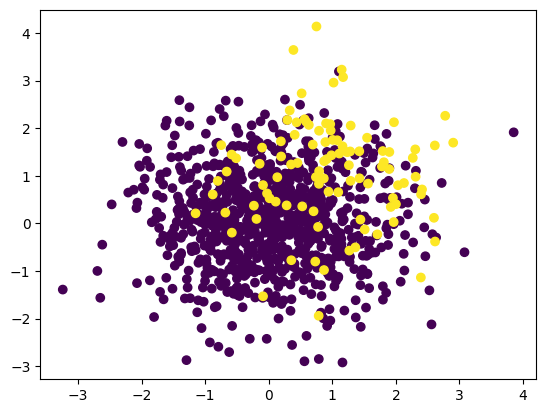

In [21]:
plt.scatter(df.feature1, df.feature2, c = df["target"])

In [22]:
%pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [23]:
from imblearn.over_sampling import SMOTE

In [24]:
oversample = SMOTE()

In [25]:
(X, y) = oversample.fit_resample(df[["feature1", "feature2"]], df["target"])

In [26]:
X

,feature1,feature2
0,0.496714,0.368673
1,-0.138264,-0.393339
2,0.647689,0.028745
3,1.523030,1.278452
4,-0.234153,0.191099
...,...,...
1795,1.701868,0.826691
1796,2.545917,-0.335943
1797,2.358114,0.774219
1798,1.486916,0.852372


In [27]:
oversample_df = pd.concat([X, y], axis = 1)
oversample_df.target.value_counts()

target
0    900
1    900
Name: count, dtype: int64

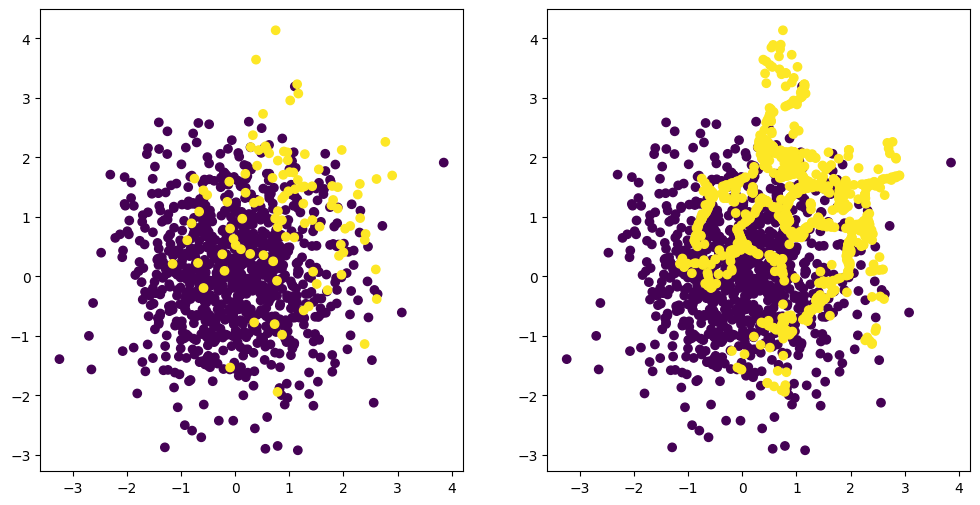

In [28]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(df.feature1, df.feature2, c = df["target"])
plt.subplot(1,2,2)
plt.scatter(oversample_df.feature1, oversample_df.feature2, c = oversample_df["target"])